# Jobloss Prediction using the KNN algorythm

### In statistics, the k-nearest neighbors algorithm is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set.
### In Our case to predict the Jobloss status we are going to use the multiple linear regression using other variabes ( Current Status , FinancialSituation , Diseases) 

## Dataset Loading

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [37]:
XXX = pd.read_csv('DimPatientCoded.csv')
XXX.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0


## Choosing the most relative variables to our predicted value

In [38]:
XX =  XXX[['Current Status','Gender','Detected State','PovertyRate','JobLoss']]
dataset = XX.replace(np.nan,0)
dataset

,Current Status,Gender,Detected State,PovertyRate,JobLoss
0,1,0,16,7.05,2
1,1,1,16,7.05,0
2,1,1,16,7.05,2
3,1,1,8,9.91,2
4,1,1,31,13.74,0
...,...,...,...,...,...
247231,1,1,15,20.91,2
247232,1,1,15,20.91,2
247233,1,1,15,20.91,0
247234,1,1,15,20.91,0


In [4]:
Cheking the Jobloss Clusters

SyntaxError: invalid syntax (<ipython-input-4-0b7e91fdb2e5>, line 1)

In [5]:
print(XX['JobLoss'].unique())

[2 0 3 1]


## Checking Clusters types and distribution 

<AxesSubplot:ylabel='JobLoss'>

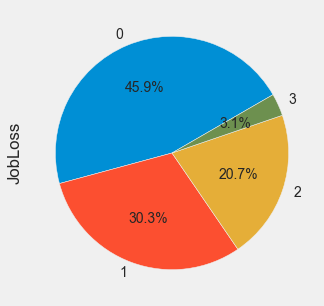

In [6]:
XX['JobLoss'].groupby(XX['JobLoss']).count().plot.pie(figsize=(5,5), autopct='%1.1f%%',startangle = 30.)

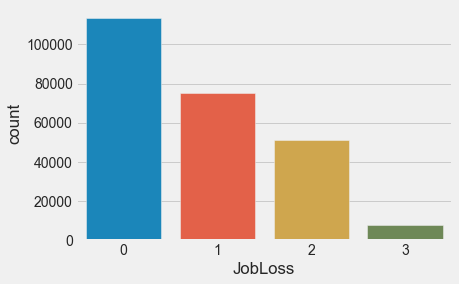

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(XX['JobLoss'],label="Count")
plt.show()

In [8]:
print(XX.groupby('JobLoss').size())

JobLoss
0    113447
1     74996
2     51149
3      7644
dtype: int64


In [9]:
print(XX.shape)

(247236, 5)


## Visualize The correlation 

Define the correlation between our predicted value "jobloss" to the other variables

### By Cross Variables Graph

In [10]:
import seaborn as sns
sns.pairplot(XX, hue="JobLoss")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018CBAF5E790> (for post_execute):


KeyboardInterrupt: 

### By the Correlation matrix

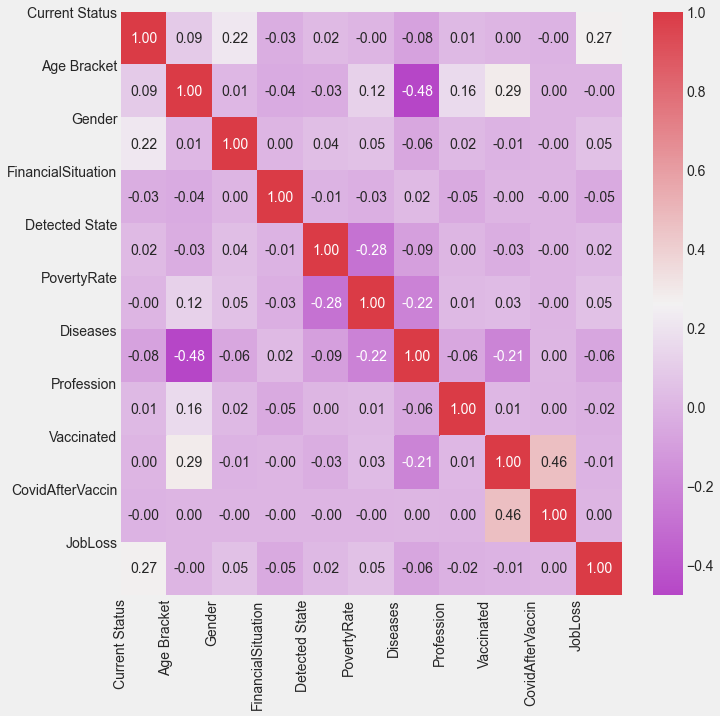

In [25]:
#Create Correlation matrix
corr = XX.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))
#Generate Color Map
colormap = sns.diverging_palette(300, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

We noticed that most related variables to jobloss are : Current Status , Gender , Detected state 

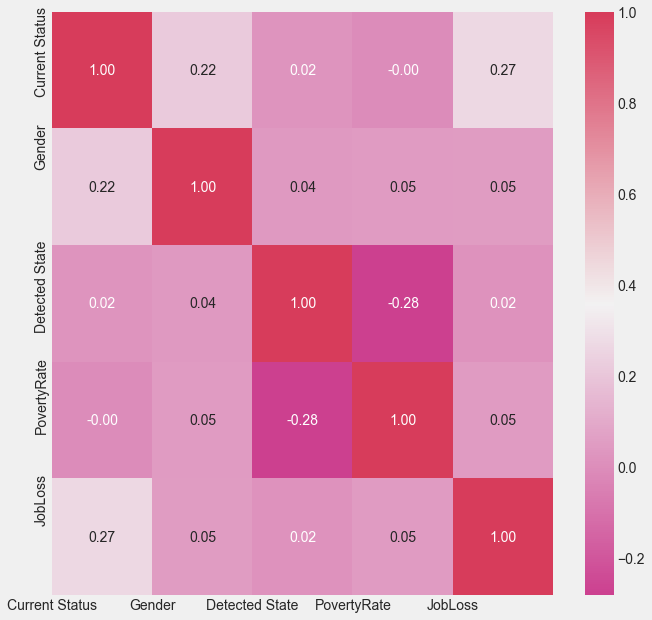

In [13]:
#Create Correlation matrix
corr = XX.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))
#Generate Color Map
colormap = sns.diverging_palette(700, 5, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [39]:
XX =  XXX[['Current Status','Diseases','FinancialSituation','JobLoss']]
dataset = XX.replace(np.nan,0)
dataset

,Current Status,Diseases,FinancialSituation,JobLoss
0,1,4,1,2
1,1,4,0,0
2,1,4,1,2
3,1,2,0,2
4,1,4,1,0
...,...,...,...,...
247231,1,4,0,2
247232,1,2,0,2
247233,1,2,1,0
247234,1,2,1,0


# KNN

## Deviding our data to training and Testing sets

In [44]:
# diviser les données en attributs et étiquettes (labes)

X = dataset.iloc[:, [0,3]].values

y= dataset.iloc[:,3].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
# Feature Scaling / Mise en echelle: Normalisation & Standardisation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Normalisation
#minmaxscaler=MinMaxScaler()
#X_train_n=minmaxscaler.fit_transform(X_train)
#X_test_n=minmaxscaler.fit_transform(X_test)

#Standardisation
standarscaler= StandardScaler()
X_train=standarscaler.fit_transform(X_train)
X_test=standarscaler.fit_transform(X_test)

## Error Estimation By K nearest neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')


KeyboardInterrupt: 

## We can choose any Value of K for the vact that the error estimation is 0 for all of them

In [47]:
knn = KNeighborsClassifier(2)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [23]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[28436     0     0     0]
 [    0 18644     0     0]
 [    0     0 12796     0]
 [    0     0     0  1933]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       1.00      1.00      1.00     18644
           2       1.00      1.00      1.00     12796
           3       1.00      1.00      1.00      1933

    accuracy                           1.00     61809
   macro avg       1.00      1.00      1.00     61809
weighted avg       1.00      1.00      1.00     61809



In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [28]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 1.00


In [29]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydot
dot_data = StringIO()
export_graphviz(dtc_model, out_file=dot_data)
#graph=pydot.graph_from_dot_data(dot_data.getvalue())
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))


[[28436     0     0     0]
 [    0 18644     0     0]
 [    0     0 12796     0]
 [    0     0     0  1933]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       1.00      1.00      1.00     18644
           2       1.00      1.00      1.00     12796
           3       1.00      1.00      1.00      1933

    accuracy                           1.00     61809
   macro avg       1.00      1.00      1.00     61809
weighted avg       1.00      1.00      1.00     61809



In [32]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [33]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [34]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [35]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,40)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#Compute accuracy on the training set
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    
    test_accuracy[i] = knn.score(X_test, y_test) 

KeyboardInterrupt: 

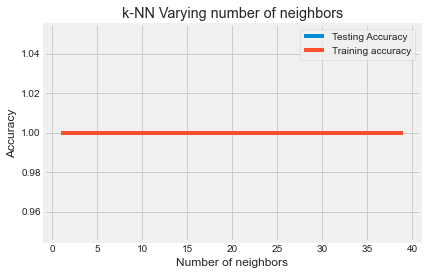

In [46]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
  

In [47]:
knn.score(X_test, y_test)

1.0

In [ ]:
import pickle
with open('Prediction_FinancialState_KNN.pkl', 'wb') as file:
    pickle.dump(KNN, file)